## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [314]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [315]:
# import data
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [316]:
# use describe to find number of rows
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [317]:
# find the number of rows in the dataset and write a text for people to understand
num_rows = df.shape[0]
print('The Number of rows is: {}'.format(num_rows))

The Number of rows is: 294478


c. The number of unique users in the dataset.

In [318]:
# use unique function
unique_user = df.nunique()['user_id']
print('The number of unique users is: {}'.format(unique_user))

The number of unique users is: 290584


d. The proportion of users converted.

In [319]:
# take mean to find proportion because values are 1 and 0
# first: without %, but in the format of .xyz
df.converted.mean()

0.11965919355605512

In [320]:
# second: as %
conv = df.converted.mean()*100
print('The proportion of converted users is {}%'.format(conv))

The proportion of converted users is 11.96591935560551%


e. The number of times the `new_page` and `treatment` don't line up.

In [321]:
# three calcs are performed: 1. treatment group lands on old_page, 2. control group lands incorrectly on new_page, and
# 3. sum of the number of times where treatment and new_page do not fit

# 1st calc
mismatch_treat = df[(df.group == 'treatment') & (df.landing_page == 'old_page')]
print('The number of times the treatment group user lands incorrectly on old_page is {}'. format(len(mismatch_treat)))

# 2nd calc
mismatch_ctrl = df[(df.group == 'control') & (df.landing_page == 'new_page')]
print('The number of times the control group user lands incorrectly on new_page is {}'. format(len(mismatch_ctrl)))

# 3rd calc
print('The number of times new_page and treatment do not fit {}'. format(len(mismatch_treat) + len(mismatch_ctrl)))

The number of times the treatment group user lands incorrectly on old_page is 1965
The number of times the control group user lands incorrectly on new_page is 1928
The number of times new_page and treatment do not fit 3893


f. Do any of the rows have missing values?

In [322]:
# function to check if any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


As we can see in above table: no values are missing

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [323]:
# drop rows in treatment groups that are mismatched
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace = True)

In [324]:
# drop rows in control groups that are mismatched
df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace = True)

In [325]:
# check
df.shape

(290585, 5)

In [326]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [327]:
# save this newly created dataset
df.to_csv('ab_data_edited.csv', index = False)

In [328]:
# read the new csv dataset into df2
df2 = pd.read_csv('ab_data_edited.csv')

In [329]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

In [330]:
# check
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


a. How many unique **user_id**s are in **df2**?

In [331]:
# identify unique_ids in df2
unique_user_df2 = len(df2['user_id'].unique())
print('The number of unique users in df2 is: {}'.format(unique_user_df2))

The number of unique users in df2 is: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [332]:
# double-check if there are any duplicate user ids
dupli_userid_df2 = sum(df2['user_id'].duplicated())
print('The user id repeated in df2 is: {}'.format(dupli_userid_df2))

The user id repeated in df2 is: 1


c. What is the row information for the repeat **user_id**? 

In [333]:
# get details of rows with duplicate user ids
df2[df2.duplicated(['user_id'], keep = False)]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [334]:
# delete duplicate record, here: 1876
df2 = df2[~df2.user_id.duplicated(keep = 'last')]

In [335]:
# check the number of entries after deleting the duplicate
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [336]:
# confirm by checking unique values of user ids
check_uni_user = len(df['user_id'].unique())
print('The number of unique users in df2 is: {}'.format(check_uni_user))

The number of unique users in df2 is: 290584


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [337]:
# here we can again use the mean to get probability of an in individual converting as values are 0 or 1
df2['converted'].mean()

0.11959708724499628

In [338]:
# in percentage:
conv_df2 = df.converted.mean()*100
print('The proportion of converted users is {}%'.format(conv_df2))

The proportion of converted users is 11.959667567149026%


b. Given that an individual was in the `control` group, what is the probability they converted?

In [339]:
# group by control
df2_ctrl_prep = df2.query('group == "control"')
df2_ctrl = df2_ctrl_prep.converted.mean()*100
print('The probability that a user in the control group converted lies at: {}%'.format(df2_ctrl))

The probability that a user in the control group converted lies at: 12.03863045004612%


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [340]:
# group by treatment
df2_treat_prep = df2.query('group == "treatment"')
df2_treat = df2_treat_prep.converted.mean()*100
print('The probability that a user in the treatment group converted lies at: {}%'.format(df2_treat))

The probability that a user in the treatment group converted lies at: 11.880806551510565%


d. What is the probability that an individual received the new page?

In [341]:
# calculate the # of users who received new page as in the treatment group, then calculate total # of users
# and finally calc the probability that the individual received the new page using the median
new_user = len(df.query("group == 'treatment'"))
users = df.shape[0]
new_user_prop = new_user/users*100
print('The probability that an individual received a new page lies at: {}%'.format(new_user_prop))

The probability that an individual received a new page lies at: 50.00636646764286%


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer:** <ul>The results suggests that individuals of the control group had a conv rate of 12.04%, whereas the treatment group had a conv rate of 11.88%. This leads us to conclude that the treatment group does not lead to more conversions compared with the control group. However, we have to note that the difference between these groups are marginal. Hence, we can not at this stage fully conclude with certainty that one page leads to more conversions. We need to do some more deep-dive analysis.</ul>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.** 

<ul><b>Hypotheses</b></ul><ul>H<sub>0</sub>: P<sub>old</sub> >= P<sub>new</sub></ul><ul>H<sub>1</sub>: P<sub>old</sub> &#60; P<sub>new</sub></ul>

<ul></ul>

<ul><b>Vice Versa</b></ul><ul>H<sub>0</sub>: P<sub>new</sub> &#60;= P<sub>old</sub></ul><ul>H<sub>1</sub>: P<sub>new</sub> > P<sub>old</sub></ul>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [342]:
p_new = df2['converted'].mean()
print('The converted rate for Pnew under null is: {}'.format(p_new))

The converted rate for Pnew under null is: 0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [343]:
p_old = df2['converted'].mean()
print('The converted rate for Pold under null is: {}'.format(p_old))

The converted rate for Pold under null is: 0.11959708724499628


c. What is $n_{new}$?

In [344]:
n_new = len(df2.query("group == 'treatment'"))
print('The n_new is: {}'.format(n_new))

The n_new is: 145310


d. What is $n_{old}$?

In [345]:
n_old = len(df2.query("group == 'control'"))
print('The n_old is: {}'.format(n_old))

The n_old is: 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [346]:
# run simulation for n_new under null
new_page_conv = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
# check
print(len(new_page_conv))

145310


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [347]:
# run simulation for n_old under null
old_page_conv = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
# check
print(len(old_page_conv))

145274


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [348]:
# finding
p_diff = new_page_conv.mean() - old_page_conv.mean()
print('The difference is: {}'.format(p_diff))

The difference is: 0.0001286702153112662


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [349]:
# use mean function for old and new page conversion simulations to overcome problem of shape difference
p_diffs = []

for _ in range(10000):
    new_page_conv = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]).mean()
    old_page_conv = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)]).mean()
    diff = new_page_conv - old_page_conv
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [350]:
# calc mean of p_diffs
p_diffs_mean = np.array(p_diffs).mean()
print(p_diffs_mean)

7.595618201137634e-06


In [351]:
ab_diff_data = df2_treat_prep.converted.mean() - df2_ctrl_prep.converted.mean()
print(ab_diff_data)

-0.0015782389853555567


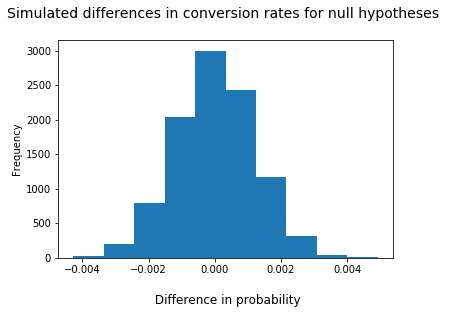

In [355]:
plt.hist(p_diffs)
plt.xlabel('\n Difference in probability', fontsize = '12')
plt.ylabel('Frequency')
plt.title('Simulated differences in conversion rates for null hypotheses \n', fontsize = '14')
plt.show()

In [356]:
act_diff = (np.array(p_diffs).mean()) - ab_diff_data
print(act_diff)

0.0015858346035566944


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [357]:
# compute difference
p_diffs = np.array(p_diffs)
print(p_diffs)

[ 0.00143647  0.0001288   0.00082374 ...  0.00078937 -0.00221825
  0.00035591]


In [358]:
# proportion of p_diffs greater than the actual difference in ab_data.csv, compute p-value:
(ab_diff_data < p_diffs).mean()

0.908

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:** <ul>1. We are computing p-values, 2. This is the probability of observing our statistic if the null hypothesis is true, 3. We find that there is no conversion advantage for the new page. Hence, null hypothesis is true as old and new page perform similarly. However, the old page performs slightly better.</ul>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [359]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

#check
print(convert_old, convert_new, n_old, n_new)

17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [360]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
print(z_score, p_value)

1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [361]:
from scipy.stats import norm

# calcs the significance level of the z-score
print(norm.cdf(z_score))

# assumption of the confidence level = 95%; the result shows us the critical value at 95% confidence level
print(norm.ppf(1-(0.05)))

0.9050583127590245
1.6448536269514722


**Answer:** <ul>1. The z-Score is 1.3109 which is less than the critical value of 1.6449 at 95% confidence level. Hence, we cannot reject the null hypothesis. 2. Old pages perform slightly better than the new pages (p-value 0.9050). 3. The findings are in-line with the findings in section j. and k.</ul>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Asnwer:** <ul>Logistic Regression</ul>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [362]:
# create dummy variables and add an intercept
df2['intercept']=1
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [363]:
# instantiate and fit the model
import statsmodels.api as sm
logit = sm.Logit(df2['converted'], df2[['intercept', 'treatment']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [364]:
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 24 Apr 2020   Pseudo R-squ.:               8.077e-06
Time:                        10:19:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Answer**:<ul> The p-value (.190) is above the alpha level of .05 but different b/c of the two tailed test. Hence, we still reject the null hypothesis. Or in other words:<ul>H<sub>0</sub>: P<sub>new</sub> - P<sub>old</sub> = 0</ul><ul>H<sub>1</sub>: P<sub>new</sub> - P<sub>old</sub> != 0</ul></ul>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**<ul>Other factors should be considered adding to the model b/c these factors also influence the overall conversions. We could add the following: Returning vs. new users, seasonality b/c of more interest in new skills/resolutions, timestamps should add regionality, more demographic variables. However, adding more variables to the model increases the complexity. We can never be certain to have included all relevant variables in a model. It is advised to keep a model as easy to understand as possible. Hence, complexity should be reduced!

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [365]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [366]:
# confirm user countries
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [367]:
# count
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [368]:
# Create the necessary dummy variables
df_new[['CA', 'US', 'UK']] = pd.get_dummies(df_new['country'])[['CA', 'US', 'UK']]
df_new['country'].astype(str).value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [369]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,CA,US,UK
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [370]:
# Fit Your Linear Model And Obtain the Results
df['intercept'] = 1

log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'treatment', 'CA', 'US']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 24 Apr 2020   Pseudo R-squ.:               2.323e-05
Time:                        10:19:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
treatment     -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

In [371]:
np.exp(results.params)

intercept    0.138154
treatment    0.985168
CA           0.950621
US           0.990165
dtype: float64

In [372]:
df.groupby('group').mean()['converted']

group
control      0.120386
treatment    0.118807
Name: converted, dtype: float64

<a id='conclusions'></a>
## Conclusions from regression analysis

The p-value for treatment is .191. Hence, the p-value is still large and we cannot reject the null hypothesis. Further, none of the p-values show significant results. The values above do not show a difference in the conversion rates for both groups 'control' and 'treatment'. Hence, we can conclude that there is not enough evidence to support an interaction between country and page that predicts whether or not a user converts. We can therefore keep the existing page as it is.   


### References

<ul>GitHub.com/statsmodels/statsmodels/issues/3931</ul>
<ul>Stackoverflow.com/questions/13851535/delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression-involving</ul>
<ul>Udacity Nanodegree videos and learning materials</ul>
<ul>pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html</ul>
<ul>stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicated-items-using-pandas-in-python</ul>
<ul>stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value</ul>
<ul>pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html</ul>